In [68]:
import pandas as pd
import numpy as np

# 그래프 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 관련 라이브러리
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

# 1. ttest_1samp 함수를 이용한 평균키 검정

In [69]:
# A 대학교 평균키는 174라고 알려져 있다.
# 실제로 174인지, 더 큰지 확인을 해보고자 한다.
# 귀무가설 : A대학교 평균키는 174와 유의한 차이가 없다.
# 대립가설 : A대학교 평균키는 174보다 더 크다. (단측 검정)

In [70]:
df_h = pd.read_csv('data/heights.csv')
print(df_h.shape)
df_h.head(3)

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747


In [71]:
# 표본 평균키
df_h['son'].mean()

np.float64(174.45753692820037)

In [72]:
#std는 **표준편차(Standard Deviation)**의 줄임말이야.
df_h['son'].std()

7.1493420461869

In [73]:
# 1 sample t-test  파란색 고정 함수  / alternative='greater'이게 방향성 가설이야 🔥→ 표본 평균 > 174 인지 검정
stats.ttest_1samp(df_h['son'], 174, alternative='greater')

TtestResult(statistic=np.float64(2.1012099902448504), pvalue=np.float64(0.017927222148374937), df=np.int64(1077))

In [74]:
# pvalue < 0.05 이므로 대립가설 채택 0.005보다 대립가설이 적다 피벨류는 대립가설의미
#결론:A 대학교 평균키는 174보다 크다

In [75]:
#if, 양측 검정을 했었다면,
# 귀무가설 : A대학교 평균키는 174와 유의한 차이가 없다.
# 대립가설 : A대학교 평균키는 174와 다르다(유의한 차이가 있다)
stats.ttest_1samp(df_h['son'], 174, alternative='two-sided')

TtestResult(statistic=np.float64(2.1012099902448504), pvalue=np.float64(0.035854444296749874), df=np.int64(1077))

In [76]:
# 차이를 직관적으로 보면
# 상황	추천
# 커지는 게 중요	greater   (더 크냐)
# 작아지는 게 중요	less
# 달라졌는지만 중요	two-sided  (디르냐)

# 2. 두 그룹 차이 검정

In [77]:
# Q. 남자 수학점수와 여자 수학점수 차이 검정

In [78]:
# 귀무가설 : 두 그룹은 차이가 없다. 
# 대립가설 : 두 그룹은 차이가 있다. (양측 검정) 
# 유의수준은 0.05 

In [79]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')

print(df_sp.shape)
df_sp.head(3)

(987, 8)


,sex,race,parental education,lunch,preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,some high school,free/reduced,none,18,32,28
2,female,group B,some college,standard,none,19,38,32


In [80]:
# 남녀 수학점수 평균
df_sp.groupby('sex')['math score'].mean()

sex
female    63.561886
male      68.393305
Name: math score, dtype: float64

In [81]:
# 남녀 수학점수 데이터 분리
male_math = df_sp[df_sp['sex'] == 'male']['math score']
female_math = df_sp[df_sp['sex'] == 'female']['math score']

In [82]:
male_math

16      27
17      28
18      33
20      34
23      35
      ... 
980     99
983    100
984    100
985    100
986    100
Name: math score, Length: 478, dtype: int64

In [83]:
female_math

0       0
1      18
2      19
3      22
4      23
       ..
975    97
976    97
979    98
981    99
982    99
Name: math score, Length: 509, dtype: int64

### 2-1. 정규성 불만족 시 => 비모수 검정

In [84]:
# shapiro(샤피로) 정규성 검정(귀무가설 : 데이터의 분포가 정규분포와 같다)

stats.shapiro(male_math), stats.shapiro(female_math)

(ShapiroResult(statistic=np.float64(0.9948297721426106), pvalue=np.float64(0.10925772997767996)),
 ShapiroResult(statistic=np.float64(0.9923991147460336), pvalue=np.float64(0.010804272932667338)))

In [85]:
# 남자 수학점수는 p-value > 0.05 이므로 귀무가설 채택. -> 정규성 만족 
# 여자 수학점수는 p-valeu < 0.05 이므로 대립가설 채택. -> 정규성 불만족 
# 정규성 검정 결과, 정규성 불만족.

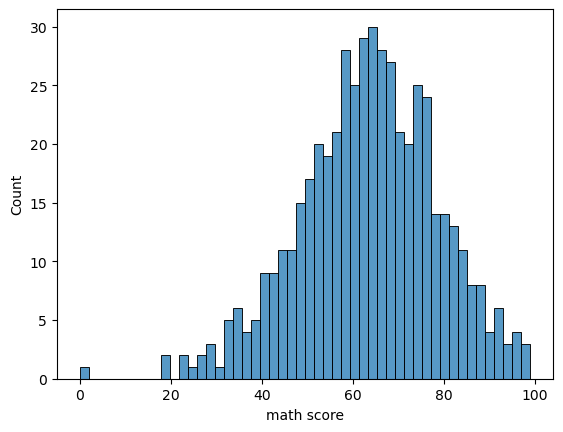

In [86]:
sns.histplot(x=female_math, binwidth=2);

In [87]:
# (비모수 검정) 윌콕슨 순위합 검정  -> 정규분포를 따르지 않는 데이터에 수행하는 t-test 대체 검정 
stats.ranksums(male_math, female_math, alternative='two-sided')

RanksumsResult(statistic=np.float64(4.842485861382294), pvalue=np.float64(1.2822476216088928e-06))

In [88]:
# 해석 : p-value < 0.000001 이므로 대립가설 채택.
# 결론 : 두 그룹은 유의한 중앙값 차이가 있다.

# 윌콕슨 순위합 검정을 사용하는 상황
# 정규성 가정이 깨짐
# 이상치 데이터 많음
# 표본 수가 적을 때 (ex. 10개 미만)

In [89]:
# 그렇다면 만약, 정규성 만족인 경우에는 어떻게 차이 검정이 진행될까요?

### 2-2. 정규성 만족 시 => 모수 검정 

In [90]:
# 데이터 전처리를 해서 정규성 만족 후 t-test를 수행해보자.

In [91]:
# 이상치가 제거된 여성 수학점수
female_math2 = female_math[female_math >= 24]
female_math2

5      24
6      26
7      27
8      29
9      29
       ..
975    97
976    97
979    98
981    99
982    99
Name: math score, Length: 504, dtype: int64

In [92]:
#다시 정규성 검정
stats.shapiro(female_math2)

ShapiroResult(statistic=np.float64(0.9958904574988353), pvalue=np.float64(0.21301966474028172))

In [93]:
#이상치가 제거된 여성 수학점수는 정규성 만족

In [94]:
# 등분산 검정(귀무가설 : 두 그룹이 분산이 같다)
stats.bartlett(male_math, female_math2)

BartlettResult(statistic=np.float64(1.6085629446036418), pvalue=np.float64(0.20469392549014304))

In [95]:
# p-value > 0.05 이므로 귀무가설 채택 -> 등분산 만족

In [96]:
# 독립 표본 t-test 
stats.ttest_ind(male_math, female_math2, alternative='two-sided', equal_var=True)

TtestResult(statistic=np.float64(4.75146572963073), pvalue=np.float64(2.3212333827714955e-06), df=np.float64(980.0))

In [97]:
# 해석 : p-value < 0.00001 이므로 대립가설 채택
# 결론 : 남자 수학점수와 여자 수학점수는 유의한 평균 차이가 있다.

In [98]:
# if, 분산이 다르다면 -> welch t-test
stats.ttest_ind(male_math, female_math2, alternative='two-sided', equal_var=False)

TtestResult(statistic=np.float64(4.7570061243342465), pvalue=np.float64(2.2598756850962233e-06), df=np.float64(979.9202720718512))

In [99]:
# 해석 : p-value < 0.00001 이므로 대립가설 채택
# 결론 : 남자 수학점수와 여자 수학점수는 유의한 평균 차이가 있다.

In [100]:
import scipy
scipy.__version__

'1.16.3'

In [101]:
# [실습]1 단측 검정 - 남자 수학점수가 더 크다(greater)

In [102]:
stats.ttest_ind(male_math,female_math2,alternative='greater')   # Welch t-test

TtestResult(statistic=np.float64(4.75146572963073), pvalue=np.float64(1.1606166913857477e-06), df=np.float64(980.0))

In [103]:
# 해석 : p-value 가 거의 0에 가까우므로 대립가설 채택
# 결론 : 남자 수학점수가 여자 수학점수보다 유의하게 평균이 더 크다.

In [104]:
# 차이를 직관적으로 보면
# 상황	추천
# 커지는 게 중요	greater   (더 크냐)
# 작아지는 게 중요	less
# 달라졌는지만 중요	two-sided  (디르냐)

In [105]:
# 귀무가설 : 두 그룹은 차이가 없다. 
# 대립가설 : 두 그룹은 차이가 있다. (양측 검정) 
# 유의수준은 0.05 

# [실습] 두 그룹 차이 검정

In [106]:
#실습
# 1. 남녀 각각 평균 reading score 계산 (groupby)
# 2. 남자 reading score와 여자 reading score 데이터 분리 후 변수로 저장
# 3. shapiro 정규성 검정 후 결과에 따라 두 그룹 차이 검정 수행
# 귀무가설 : 차이가 없다.
# 대립가설 : 남성 점수가 여성 점수보다 작다(less).
# 4. 남녀 독해점수 Welch's t-test 수행

In [107]:
#1
# 남녀 수학점수 평균
df_sp.groupby('sex')['reading score'].mean()

sex
female    72.426326
male      65.069038
Name: reading score, dtype: float64

In [108]:
#2 남녀 수학점수 데이터 분리
male_reading = df_sp[df_sp['sex'] == 'male']['reading score']
female_reading = df_sp[df_sp['sex'] == 'female']['reading score']

In [109]:
male_reading

16      34
17      23
18      34
20      23
23      28
      ... 
980     87
983    100
984     96
985     97
986    100
Name: reading score, Length: 478, dtype: int64

In [110]:
female_reading

0       17
1       32
2       38
3       39
4       44
      ... 
975    100
976     97
979    100
981    100
982     93
Name: reading score, Length: 509, dtype: int64

In [111]:
# 3. shapiro 정규성 검정 후 결과에 따라 두 그룹 차이 검정 수행
# 귀무가설 : 차이가 없다.
# 대립가설 : 남성 점수가 여성 점수보다 작다(less).✨

# shapiro(샤피로) (이 데이터가 정규분포처럼 생겼는지” 확인하려고 하는 거야.)
#한 줄로 말하면 데이터가 평균을 중심으로 좌우 대칭이고,가운데가 가장 많고 양쪽으로 갈수록 점점 적어지는 모양이게 “정규분포처럼 생겼다”는 뜻이야.

stats.shapiro(male_reading), stats.shapiro(female_reading)

(ShapiroResult(statistic=np.float64(0.9937645141993083), pvalue=np.float64(0.04648775879252898)),
 ShapiroResult(statistic=np.float64(0.9814912759744497), pvalue=np.float64(4.534418957286062e-06)))

In [112]:
# 남자 읽기점수는 p-value < 0.05 이므로 귀무가설 채택. -> 정규성 불만족 ✨
# 여자 읽기점수는 p-valeu < 0.05 이므로 대립가설 채택. -> 정규성 불만족 ✨

In [113]:
#(비모수 검정) 윌콕슨 순위합 검정  / 대립가설 : 남성 점수가 여성 점수보다 작다(less).✨

stats.ranksums(male_reading, female_reading, alternative='less')

RanksumsResult(statistic=np.float64(-8.011601115395095), pvalue=np.float64(5.66122935704983e-16))

In [114]:
#해석: p-value가 거의 0에 가까우므로 대립가설 채택 
#결론: 남성 독해점수는 여성 독해점수보다 유의하게 중앙값이 더 작다

In [115]:
# 4. 남녀 독해점수 Welch's t-test 수행 ✨ Welch’s t-test = 두 그룹의 분산이 달라도 평균 비교를 안전하게 해주는 t-test

stats.ttest_ind(male_reading, female_reading, alternative='less', equal_var = False)

TtestResult(statistic=np.float64(-8.08102018025995), pvalue=np.float64(9.353435665130404e-16), df=np.float64(984.609308886994))

In [116]:
#해석: p-value가 거의 0에 가까우므로 대립가설 채택 
#결론: 남성 독해점수는 여성 독해점수보다 유의하게 평균이 더 작다

In [117]:
# 퍼포먼스 마케터
# 광고 A/B 테스트
# 소재·문구·타겟 비교
# 전환율 차이 검증

# CRM / 그로스 마케터
# 쿠폰 전/후 효과
# 푸시 메시지 A/B
# 고객군별 평균 구매액 비교
# 👉 paired t-test / Welch t-test 많이 씀.

# 데이터 마케터 / 마케팅 분석가
# 성별·연령대 성과 비교
# 캠페인 효과 검증
# 실험 설계
# 👉 지금 네가 한 코드들 = 기본 무기


In [118]:
# 1️⃣ 퍼포먼스 마케터
# 문제: 광고 A/B 테스트 – 전환율 차이가 진짜인가?
# 📌 실무 상황
# 광고 A vs 광고 B
# 하루 전환 수를 14일간 수집
# 광고 B가 더 좋아 보이는데 우연인지 검증 필요
import pandas as pd
#데이터 예시
df_ads = pd.DataFrame({'ad_type': ['A']*14 + ['B']*14,'conversions': [
        23, 25, 22, 24, 26, 21, 23, 24, 25, 22, 24, 23, 26, 25,
        28, 30, 27, 29, 31, 28, 30, 29, 32, 30, 31, 29, 30, 31]})
df_ads

,ad_type,conversions
0,A,23
1,A,25
2,A,22
3,A,24
4,A,26
5,A,21
6,A,23
7,A,24
8,A,25
9,A,22


In [119]:
#문제
#광고 B의 전환 수가 광고 A보다 유의하게 큰가?
#코드 (Welch 단측 t-test)


from scipy import stats

ad_a = df_ads[df_ads['ad_type'] == 'A']['conversions']
ad_b = df_ads[df_ads['ad_type'] == 'B']['conversions']
# alternative =대안,선택지(얼터너티브)
stats.ttest_ind(ad_b, ad_a, alternative='greater',equal_var=False)
# 상황	추천
# 커지는 게 중요	greater   (더 크냐)
# 작아지는 게 중요	less
# 달라졌는지만 중요	two-sided  (디르냐)


TtestResult(statistic=np.float64(10.59975262843722), pvalue=np.float64(3.4314483232996485e-11), df=np.float64(25.779212014388957))

In [120]:
#광고 B의 평균 전환 수는 광고 A보다
#통계적으로 유의하게 높다 (p < 0.05)

In [121]:
# 2️⃣ CRM / 그로스 마케터
# 문제: 쿠폰 발송 전/후 평균 구매금액이 늘었는가?
# 📌 실무 상황
# 동일 고객에게 쿠폰 발송
# 발송 전/후 구매금액 비교
# # 개인별 변화 → paired t-test

In [122]:
df_crm = pd.DataFrame({'before': [32000, 28000, 35000, 30000, 27000, 29000],'after':  [36000, 31000, 39000, 33000, 30000, 34000]})
df_crm

,before,after
0,32000,36000
1,28000,31000
2,35000,39000
3,30000,33000
4,27000,30000
5,29000,34000


In [123]:
#코드 (대응표본 t-test)
stats.ttest_rel(df_crm['after'],df_crm['before'],alternative='greater')

TtestResult(statistic=np.float64(10.999999999999998), pvalue=np.float64(5.402610277249144e-05), df=np.int64(5))

In [124]:
#쿠폰 발송 이후 고객의 평균 구매금액은
#통계적으로 유의하게 증가하였다
#→ 0.00005402610277249144 (p < 0.05) 0.05가 높으면 늘었는값이 맞는거?

In [125]:
# 3️⃣ 데이터 마케터 / 마케팅 분석가
# 문제: 신규 고객 vs 기존 고객 평균 주문금액 차이 분석
# 📌 실무 상황
# 신규 고객 / 기존 고객
# 주문금액 분산이 많이 다름
# Welch t-test 필수 (실무에서 많이 쓰는 데스트)

In [126]:
df_orders = pd.DataFrame({'customer_type': ['new']*8 + ['existing']*8,'order_value': [21000, 23000, 20000, 22000, 24000, 21000, 22500, 21500,
        35000, 42000, 39000, 41000, 38000, 40000, 43000, 39000]})
df_orders

,customer_type,order_value
0,new,21000
1,new,23000
2,new,20000
3,new,22000
4,new,24000
5,new,21000
6,new,22500
7,new,21500
8,existing,35000
9,existing,42000


In [127]:
#문제
#기존 고객의 평균 주문금액이 신규 고객보다 유의하게 큰가?

In [128]:
new = df_orders[df_orders['customer_type'] == 'new']['order_value']
new

0    21000
1    23000
2    20000
3    22000
4    24000
5    21000
6    22500
7    21500
Name: order_value, dtype: int64

In [129]:
existing = df_orders[df_orders['customer_type'] == 'existing']['order_value']
existing

8     35000
9     42000
10    39000
11    41000
12    38000
13    40000
14    43000
15    39000
Name: order_value, dtype: int64

In [130]:
#스탯츠(통계)
stats.ttest_ind(existing,new,alternative='greater',equal_var=False)

TtestResult(statistic=np.float64(17.870069012620995), pvalue=np.float64(1.91119126855841e-09), df=np.float64(10.40102827763496))

In [131]:
#기존 고객의 평균 주문금액은 신규 고객보다
#통계적으로 유의하게 높다

In [132]:
#stats.ttest_ind 👉 서로 다른 두 집단 비교   (웰치 티테스트 맞는듯?)
#stats.ttest_rel 👉 같은 대상의 전/후 비교

# 상황	추천
# 커지는 게 중요	greater   (더 크냐) 앞에 쓴 게 더 크냐
# 작아지는 게 중요	less       (더작냐) 앞에 쓴 게 더 작냐
# 달라졌는지만 중요	two-sided  (디르냐)

#이퀄 /  분산 = 데이터가 평균에서 얼마나 퍼져 있는지
#equal_var = 두 집단의 분산(variance)이 같은지 여부를 가정할지 설정하는 옵션
#False → “분산이 같다고 가정하지 않음
#True → “분산이 같다고 가정함” (기본값)

# 3. 분산분석(anova) : 세 그룹 이상 차이 검정

In [136]:
df_ins['ins_type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
# Q. 보험료 데이터에서 ins_type 간 가입기간(period)는 차이가 있을까? 
# 귀무가설 : 그룹 간 차이가 없다
# 대립가설 : 

In [140]:
df_ins = pd.read_csv('data/insurance.csv')
df_ins.shape
df_ins.head(3)

,age,sex,bmi,children,smoker,region,charges,ins_type,period
0,18,male,53.13,0,no,southeast,1163.4627,A,7.4
1,22,male,52.58,1,yes,southeast,44501.3982,B,6.5
2,23,male,50.38,1,no,southeast,2438.0552,C,4.5


In [138]:
# 보험타입(ins_type) 별 보험기간(period) 평균은? (groupby)
df_ins.groupby('ins_type')['period'].mean()

ins_type
A    5.205543
B    4.986253
C    5.083592
Name: period, dtype: float64

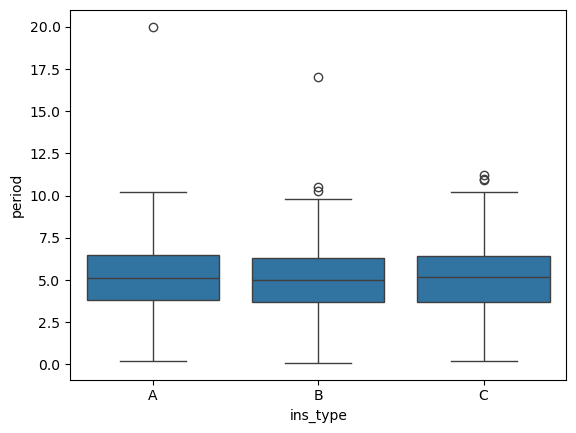

In [139]:
# 상자그림
sns.boxplot(df_ins, y='period', x='ins_type');

### 3-1. stats.f_oneway 활용한 분산분석

In [142]:
# 데이터를 그룹별로 분할 후 f_oneway() 함수 활용
g1 = df_ins[df_ins['ins_type'] == 'A']['period']
g2 = df_ins[df_ins['ins_type'] == 'B']['period']
g3 = df_ins[df_ins['ins_type'] == 'C']['period']

In [143]:
g3

2       4.5
4       4.0
5       6.6
6       2.0
7       5.3
       ... 
1347    3.0
1348    3.4
1349    3.5
1350    2.2
1352    6.4
Name: period, Length: 451, dtype: float64

In [144]:
#정규성 검정  (귀무가설: 데이터가 정규분포를 따른다)  ✨“이 데이터, 종 모양이라고 가정해도 되냐?”를 검사하는 거야.
# 정규성 검정에서 나오는 결과 해석
# 보통 이렇게 봐 👇
# 귀무가설(H₀): 데이터는 정규분포를 따른다
# p-value ≥ 0.05 → 정규분포라고 봐도 됨
# p-value < 0.05 → 정규분포 아님
stats.shapiro(g1), stats.shapiro(g2), stats.shapiro(g3)

(ShapiroResult(statistic=np.float64(0.9609627280677312), pvalue=np.float64(1.4330273745547826e-09)),
 ShapiroResult(statistic=np.float64(0.979152137466476), pvalue=np.float64(4.53409450856129e-06)),
 ShapiroResult(statistic=np.float64(0.993884463720728), pvalue=np.float64(0.06630241192528225)))

In [145]:
# 정규성 불만족으로 비모수 검정  ✨종 모양이라고 가정 못 하니까, 가정 없는 방식으로 비교하자”
# kruskal(anova를 대체하는 비모수 검정)
stats.kruskal(g1,g2,g3)

KruskalResult(statistic=np.float64(2.1702378162710483), pvalue=np.float64(0.3378616090120884))

In [ ]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택
# 결론 : 그룹 간 중앙값 차이가 없다.

In [146]:
# if, 정규성 만족이었다면,

# 등분산 검정(귀무가설 : 그룹 간 분산이 같다) 
stats.bartlett(g1, g2, g3)

BartlettResult(statistic=np.float64(2.3844658034005226), pvalue=np.float64(0.3035427257255459))

In [ ]:
#등분산 만족

In [147]:
#분산분석(anova)
stats.f_oneway(g1,g2,g3)

F_onewayResult(statistic=np.float64(1.3640782415863413), pvalue=np.float64(0.25596826874927986))

In [ ]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택
# 결론 : 그룹 간 평균 차이가 없다.

### 3-2. anova_lm 활용한 분산분석

In [ ]:
# 정규성, 등분산 만족 가정
# 데이터 분리 필요 없는 방법

In [148]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
# Q. 보험타입 간 가입기간(period)는 차이가 있을까?

In [ ]:
#data = ols("수치형변수 ~ C(범주형변수)", df).fit()
#anova_lm(data)

In [149]:
#분산분석 (간단 버전)
#          ✨ 종속변수   독립변수    데이터  모델을 데이터에 맞게 학습(추정)시키는 함수 
data = ols("period ~ C(ins_type)", df_ins).fit()
anova_lm(data)

,df,sum_sq,mean_sq,F,PR(>F)
C(ins_type),2.0,10.889446,5.444723,1.364078,0.255968
Residual,1350.0,5388.529490,3.991503,NaN,NaN


In [ ]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택
# 결론 : 그룹 간 평균 차이가 없다

In [ ]:
# Q : 분산분석 시 ols에서 띄어쓰기가 있는 변수를 묶어주는 방법
# data = ols("Q('math score') ~ C(race)", df_sp).fit()

In [151]:
# 데이터 df_sp 에서 race별 math score의 차이가 있을까?
# 분산분석 수행(정규성, 등분산 가정)

data = ols("Q('math score') ~ C(race)", df_sp).fit()
anova_lm(data)

,df,sum_sq,mean_sq,F,PR(>F)
C(race),4.0,11672.313877,2918.078469,13.748067,6.500327e-11
Residual,982.0,208433.153195,212.253720,NaN,NaN


In [ ]:
# 해석 : p-value < 0.05 이므로 대립가설 채택
# 결론 : 그룹 간 평균 차이가 있다

In [ ]:
# [실습] 띄어쓰기가 있는 변수들의 분산분석
# 1. 데이터 df_sp에서 parental education 별 reading score의 평균 계산하기
# 2. 1번의 두 변수를 활용해서 anova_lm 함수로 분산분석 수행하기(정규성, 등분산 가정)

In [154]:
# 1. 데이터 df_sp에서 parental education 별 reading score의 평균 계산하기
df_sp.groupby('parental education')['reading score'].mean()

parental education
associate's degree    70.655814
bachelor's degree     72.614035
high school           64.422680
master's degree       75.372881
some college          69.216814
some high school      66.541899
Name: reading score, dtype: float64

In [159]:
# 2. 1번의 두 변수를 활용해서 anova_lm 함수로 분산분석 수행하기(정규성, 등분산 가정)
data = ols("Q('reading score') ~ Q('parental education')", df_sp).fit()
anova_lm(data)

,df,sum_sq,mean_sq,F,PR(>F)
Q('parental education'),5.0,9613.038501,1922.607700,9.176232,1.514141e-08
Residual,981.0,205539.496453,209.520384,NaN,NaN


In [ ]:
# 해석 : p-value가 0에 가까우므로, 대립가설 채택.
# 결론 : 적어도 두 parental education 그룹 간에는 유의한 reading score 평균 차이가 있다.

# 4. 독립성 검정(카이제곱 검정)

In [ ]:
# 두 범주형 변수 간 독립(연관성) 여부 확인
#독림성 검정 카이제곱검정은 평균을 구하지 않는다 숫자 수치형변수X  차이를 찾는게 목표

In [ ]:
# Q. 성별(남, 녀)과 흡연여부(YES, NO)는 서로 독립인가(연관성이 있는가)

In [ ]:
# 귀무가설 : 두 범주형 변수는 독립이다.
# 대립가설 : 두 범주형 변수는 독립이 아니다.

In [160]:
ct = pd.crosstab(df_ins['sex'], df_ins['smoker'])
ct

smoker,no,yes
sex,,
female,549,117
male,518,169


In [161]:
# 독립성 검정
stats.chi2_contingency(ct)

Chi2ContingencyResult(statistic=np.float64(9.61426576423706), pvalue=np.float64(0.0019307163989584425), dof=1, expected_freq=array([[525.2195122, 140.7804878],
       [541.7804878, 145.2195122]]))

In [ ]:
# 해석 : p-value < 0.05 이므로 대립가설 채택
# 결론 : 성별과 흡연 여부는 독립이 아니다 (연관성이 있다)

In [162]:
# (강의자료 독립성 검정 예시) 연령대에 따른 상품 선호도
import pandas as pd

# 교차표 생성
data = {'20대': [30, 20, 0],'30대': [0, 20, 30]}

index = ['A', 'B', 'C']
age_product = pd.DataFrame(data, index=index)
age_product


,20대,30대
A,30,0
B,20,20
C,0,30


In [163]:
stats.chi2_contingency(age_product)

Chi2ContingencyResult(statistic=np.float64(60.0), pvalue=np.float64(9.357622968840163e-14), dof=2, expected_freq=array([[15., 15.],
       [20., 20.],
       [15., 15.]]))

### [실습] 독립성 검정

In [ ]:
# Q. race 와 parental education은 서로 독립인가?
# 1. df_sp 데이터의 race 와 parental education 교차표 만들고 ct 변수에 저장
# 2. 독립성 검정